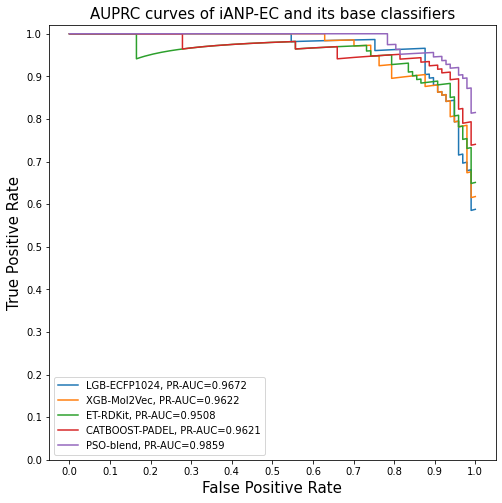

In [2]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_recall_curve, average_precision_score
import os

#============================================================
# Define data information
feature_list = ['mf1024', 'mol2vec', 'rd', 'padel', 'top4']
feature_name = ['LGB-ECFP1024', 'XGB-Mol2Vec', 'ET-RDKit', 'CATBOOST-PADEL', 'PSO-blend']    
learning_algorithm = ['lgb', 'et', 'rf', 'xgb', 'meta']

# AUPRC plot
precision_list, recall_list, auc_list = [], [], []
for i in range(len(feature_list)):
    df = pd.read_csv("PSO_pred_{}_{}_allseeds.csv".format(learning_algorithm[i].lower(), feature_list[i]), encoding='utf-8')
    true_class =pd.read_csv('label_test.csv')
    precision, recall, _ = precision_recall_curve(true_class,  df['trial_1'])
    auc = np.round(average_precision_score(true_class, df['trial_1']), 4)
    precision_list.append(precision)
    recall_list.append(recall)
    auc_list.append(auc)

fig = plt.figure(figsize=(8,8))
for i in range(0,5):
    plt.plot(recall_list[i], precision_list[i], label="{}, PR-AUC={:.4f}".format(feature_name[i], auc_list[i]))
    #plt.plot([1,0], [0,1], color='blue', linestyle='--')
    
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('AUPRC curves of iANP-EC and its base classifiers', fontsize=15)
plt.legend(prop={'size':10}, loc='lower left')
plt.show()



In [3]:
fig.savefig("AUPRC_{}.PNG".format('top4'))